In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
import torchvision
import torchvision.transforms as transforms
from models import Generator, Discriminator, TeacherDiscriminator, DP_GAN, PATE_GAN
from utils import plot_samples, plot_loss, save
from opacus import PrivacyEngine

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
BATCH_SIZE = 64
LATENT_DIM = 100
NUM_EPOCHS = 30
NUM_TEACHERS = 10

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True)

In [6]:
dp_generator = Generator(LATENT_DIM).to(device)
dp_discriminator = Discriminator().to(device)

In [7]:
criterion = nn.BCELoss()
dp_optimizer_G = optim.Adam(dp_generator.parameters(), lr=0.0002)
dp_optimizer_D = optim.Adam(dp_discriminator.parameters(), lr=0.0002)

In [8]:
privacy_engine = PrivacyEngine()
dp_discriminator, dp_optimizer_D, mnist_train_loader = privacy_engine.make_private(
    module=dp_discriminator,
    optimizer=dp_optimizer_D,
    data_loader=mnist_train_loader,
    noise_multiplier=0.2,
    max_grad_norm=1.0,
    poisson_sampling = False,
)

D:\Programs\anaconda3\envs\pete-gan\Lib\site-packages\opacus\privacy_engine.py:95: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(


In [9]:
dp_gan = DP_GAN(
    dp_generator, 
    dp_discriminator, 
    LATENT_DIM
)

In [10]:
history_dp_gan = dp_gan.train(
    mnist_train_loader,
    dp_optimizer_G,
    dp_optimizer_D,
    criterion=criterion,
    epochs=NUM_EPOCHS,
    device=device
)

Epoch 1/30:   0%|          | 0/938 [00:00<?, ?batch/s]D:\Programs\anaconda3\envs\pete-gan\Lib\site-packages\torch\nn\modules\module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Epoch 1/30: 100%|██████████| 938/938 [00:18<00:00, 52.06batch/s]


Epoch [1/30], Generator Loss: 1.3035664895831396, Discriminator Loss: 1.0125959510488043


Epoch 2/30: 100%|██████████| 938/938 [00:17<00:00, 53.60batch/s]


Epoch [2/30], Generator Loss: 1.3205764311463086, Discriminator Loss: 1.0725308308469208


Epoch 3/30: 100%|██████████| 938/938 [00:17<00:00, 54.13batch/s]


Epoch [3/30], Generator Loss: 1.7274697880500924, Discriminator Loss: 0.9573520144292795


Epoch 4/30: 100%|██████████| 938/938 [00:17<00:00, 54.35batch/s]


Epoch [4/30], Generator Loss: 2.1007339153716815, Discriminator Loss: 0.9123388622234117


Epoch 5/30: 100%|██████████| 938/938 [00:17<00:00, 54.31batch/s]


Epoch [5/30], Generator Loss: 2.131687546716824, Discriminator Loss: 0.9701468954716664


Epoch 6/30: 100%|██████████| 938/938 [00:16<00:00, 55.25batch/s]


Epoch [6/30], Generator Loss: 2.092167866509606, Discriminator Loss: 1.0313578485680033


Epoch 7/30: 100%|██████████| 938/938 [00:16<00:00, 55.98batch/s]


Epoch [7/30], Generator Loss: 1.831754745959219, Discriminator Loss: 1.100368518882723


Epoch 8/30: 100%|██████████| 938/938 [00:16<00:00, 55.51batch/s]


Epoch [8/30], Generator Loss: 1.9218042349256177, Discriminator Loss: 1.1026828914308853


Epoch 9/30: 100%|██████████| 938/938 [00:16<00:00, 55.89batch/s]


Epoch [9/30], Generator Loss: 1.9574420994787074, Discriminator Loss: 1.1744049512374122


Epoch 10/30: 100%|██████████| 938/938 [00:16<00:00, 55.69batch/s]


Epoch [10/30], Generator Loss: 1.6474492101272795, Discriminator Loss: 1.342096101754764


Epoch 11/30: 100%|██████████| 938/938 [00:16<00:00, 55.73batch/s]


Epoch [11/30], Generator Loss: 1.3412731831261853, Discriminator Loss: 1.3554750532229571


Epoch 12/30: 100%|██████████| 938/938 [00:16<00:00, 55.86batch/s]


Epoch [12/30], Generator Loss: 1.348078966776191, Discriminator Loss: 1.3234666674884397


Epoch 13/30: 100%|██████████| 938/938 [00:16<00:00, 55.95batch/s]


Epoch [13/30], Generator Loss: 1.4304879753193114, Discriminator Loss: 1.344757375241851


Epoch 14/30: 100%|██████████| 938/938 [00:16<00:00, 55.95batch/s]


Epoch [14/30], Generator Loss: 1.3582092078128603, Discriminator Loss: 1.3733735736499209


Epoch 15/30: 100%|██████████| 938/938 [00:16<00:00, 55.76batch/s]


Epoch [15/30], Generator Loss: 1.365165013367179, Discriminator Loss: 1.3085024344768605


Epoch 16/30: 100%|██████████| 938/938 [00:16<00:00, 55.95batch/s]


Epoch [16/30], Generator Loss: 1.3612813661093397, Discriminator Loss: 1.3107653891226885


Epoch 17/30: 100%|██████████| 938/938 [00:16<00:00, 55.41batch/s]


Epoch [17/30], Generator Loss: 1.359325810472594, Discriminator Loss: 1.2990509258912826


Epoch 18/30: 100%|██████████| 938/938 [00:16<00:00, 55.43batch/s]


Epoch [18/30], Generator Loss: 1.4197787625321956, Discriminator Loss: 1.3511415357782897


Epoch 19/30: 100%|██████████| 938/938 [00:16<00:00, 55.40batch/s]


Epoch [19/30], Generator Loss: 1.4032745425507966, Discriminator Loss: 1.3320157856448118


Epoch 20/30: 100%|██████████| 938/938 [00:16<00:00, 55.57batch/s]


Epoch [20/30], Generator Loss: 1.2508832016733409, Discriminator Loss: 1.4129502596631487


Epoch 21/30: 100%|██████████| 938/938 [00:17<00:00, 54.69batch/s]


Epoch [21/30], Generator Loss: 1.1564557758221494, Discriminator Loss: 1.3482546888943165


Epoch 22/30: 100%|██████████| 938/938 [00:17<00:00, 55.15batch/s]


Epoch [22/30], Generator Loss: 1.2333096488833681, Discriminator Loss: 1.313753800732749


Epoch 23/30: 100%|██████████| 938/938 [00:16<00:00, 55.45batch/s]


Epoch [23/30], Generator Loss: 1.1490826597218828, Discriminator Loss: 1.3230379458937818


Epoch 24/30: 100%|██████████| 938/938 [00:16<00:00, 55.59batch/s]


Epoch [24/30], Generator Loss: 1.1531832953378844, Discriminator Loss: 1.3535143006712134


Epoch 25/30: 100%|██████████| 938/938 [00:16<00:00, 55.95batch/s]


Epoch [25/30], Generator Loss: 1.1838125823530308, Discriminator Loss: 1.3438160790563392


Epoch 26/30: 100%|██████████| 938/938 [00:16<00:00, 55.52batch/s]


Epoch [26/30], Generator Loss: 1.1451520626860132, Discriminator Loss: 1.358477039250738


Epoch 27/30: 100%|██████████| 938/938 [00:16<00:00, 55.33batch/s]


Epoch [27/30], Generator Loss: 1.113357556654192, Discriminator Loss: 1.3475363954806379


Epoch 28/30: 100%|██████████| 938/938 [00:17<00:00, 52.86batch/s]


Epoch [28/30], Generator Loss: 1.0665337828430794, Discriminator Loss: 1.3378095950907483


Epoch 29/30: 100%|██████████| 938/938 [00:17<00:00, 52.18batch/s]


Epoch [29/30], Generator Loss: 1.107926986873277, Discriminator Loss: 1.348361030316302


Epoch 30/30: 100%|██████████| 938/938 [00:17<00:00, 53.84batch/s]


Epoch [30/30], Generator Loss: 1.126227106875194, Discriminator Loss: 1.3394974132717798


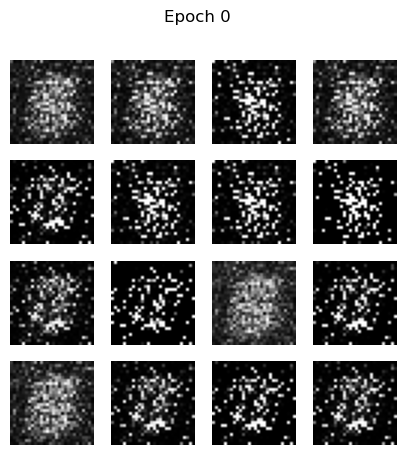

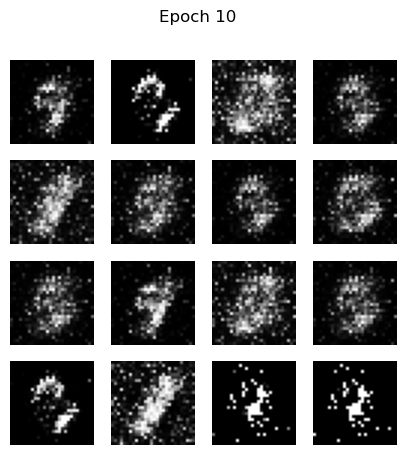

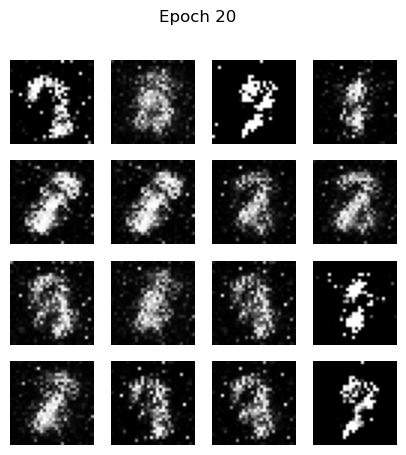

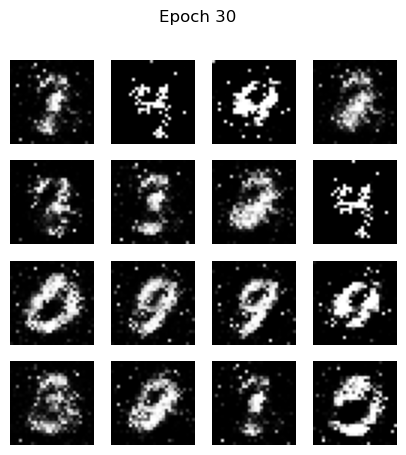

In [11]:
for i, samples in enumerate(history_dp_gan['samples']):
    plot_samples(samples, i * 10)

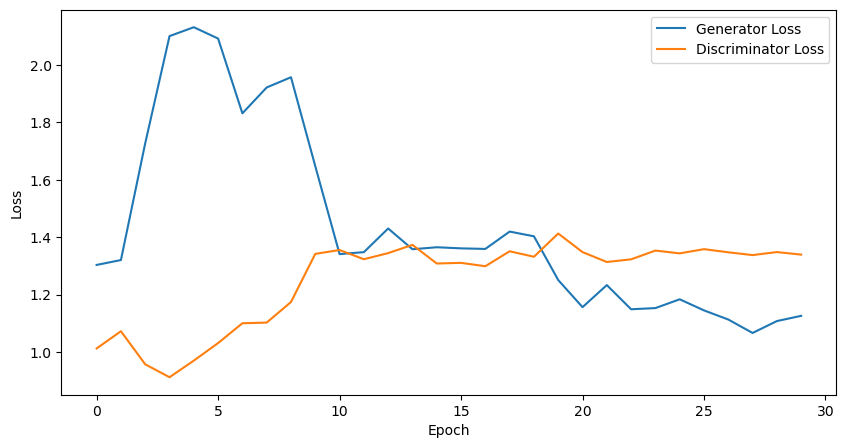

In [12]:
plot_loss(history_dp_gan)

In [13]:
save(dp_gan.generator, dp_gan.discriminator, history_dp_gan, name='dp_gan')

In [14]:
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True)

In [15]:
pate_generator = Generator(LATENT_DIM).to(device)
pate_student_discriminator = Discriminator().to(device)

In [16]:
criterion = nn.BCELoss()
teacher_models = [TeacherDiscriminator().to(device) for _ in range(NUM_TEACHERS)]
teacher_optimizers = [optim.Adam(model.parameters(), lr=0.0002) for model in teacher_models]

In [17]:
pate_gan = PATE_GAN(
    pate_generator, 
    teacher_models, 
    pate_student_discriminator, 
    LATENT_DIM
)

In [18]:
pate_gan.train_teacher_models(
    mnist_train, 
    teacher_optimizers, 
    criterion=criterion, 
    epochs=NUM_EPOCHS, 
    batch_size=BATCH_SIZE, 
    device=device
)

Teacher 10 Epoch 30/30: 100%|██████████| 2820/2820 [00:19<00:00, 141.09batch/s]


In [19]:
pate_optimizer_G = optim.Adam(pate_gan.generator.parameters(), lr=0.0002)
pate_optimizer_S = optim.Adam(pate_gan.student_discriminator.parameters(), lr=0.0002)

In [20]:
history_pate_gan = pate_gan.train(
    mnist_train_loader,
    pate_optimizer_G,
    pate_optimizer_S,
    criterion=criterion,
    epochs=NUM_EPOCHS,
    noise_scale=0.2,
    device=device
)

Epoch 1/30: 100%|██████████| 938/938 [00:14<00:00, 65.38batch/s]


Epoch [1/30], Generator Loss: 6.051564703109676, Student Discriminator Loss: 0.2391707671206516


Epoch 2/30: 100%|██████████| 938/938 [00:14<00:00, 65.48batch/s]


Epoch [2/30], Generator Loss: 6.415368142666847, Student Discriminator Loss: 0.21211364291020549


Epoch 3/30: 100%|██████████| 938/938 [00:14<00:00, 65.04batch/s]


Epoch [3/30], Generator Loss: 6.908581117068781, Student Discriminator Loss: 0.17220567256760305


Epoch 4/30: 100%|██████████| 938/938 [00:17<00:00, 54.46batch/s]


Epoch [4/30], Generator Loss: 7.47743242940923, Student Discriminator Loss: 0.11223861028545543


Epoch 5/30: 100%|██████████| 938/938 [00:16<00:00, 56.58batch/s]


Epoch [5/30], Generator Loss: 6.892898530848245, Student Discriminator Loss: 0.1464617190711788


Epoch 6/30: 100%|██████████| 938/938 [00:15<00:00, 60.31batch/s]


Epoch [6/30], Generator Loss: 6.578588628311401, Student Discriminator Loss: 0.22845770458160625


Epoch 7/30: 100%|██████████| 938/938 [00:17<00:00, 53.65batch/s]


Epoch [7/30], Generator Loss: 5.832897970162984, Student Discriminator Loss: 0.20541982801118766


Epoch 8/30: 100%|██████████| 938/938 [00:14<00:00, 64.38batch/s]


Epoch [8/30], Generator Loss: 5.576224715470759, Student Discriminator Loss: 0.26026428408666585


Epoch 9/30: 100%|██████████| 938/938 [00:14<00:00, 63.51batch/s]


Epoch [9/30], Generator Loss: 4.590551552360754, Student Discriminator Loss: 0.3588695548204725


Epoch 10/30: 100%|██████████| 938/938 [00:13<00:00, 68.18batch/s]


Epoch [10/30], Generator Loss: 4.386117628896669, Student Discriminator Loss: 0.36973151088015105


Epoch 11/30: 100%|██████████| 938/938 [00:13<00:00, 70.03batch/s]


Epoch [11/30], Generator Loss: 3.8317122033664157, Student Discriminator Loss: 0.43408173519665244


Epoch 12/30: 100%|██████████| 938/938 [00:14<00:00, 64.22batch/s]


Epoch [12/30], Generator Loss: 3.6390709686380966, Student Discriminator Loss: 0.4489648178664606


Epoch 13/30: 100%|██████████| 938/938 [00:13<00:00, 71.83batch/s]


Epoch [13/30], Generator Loss: 3.6228009483961663, Student Discriminator Loss: 0.505762406011253


Epoch 14/30: 100%|██████████| 938/938 [00:14<00:00, 64.85batch/s]


Epoch [14/30], Generator Loss: 3.467216992174893, Student Discriminator Loss: 0.5180864189225219


Epoch 15/30: 100%|██████████| 938/938 [00:13<00:00, 67.05batch/s]


Epoch [15/30], Generator Loss: 3.27510078210058, Student Discriminator Loss: 0.5267801681624801


Epoch 16/30: 100%|██████████| 938/938 [00:14<00:00, 66.22batch/s]


Epoch [16/30], Generator Loss: 3.029352918743833, Student Discriminator Loss: 0.5817166149362064


Epoch 17/30: 100%|██████████| 938/938 [00:13<00:00, 68.58batch/s]


Epoch [17/30], Generator Loss: 2.6650571940041807, Student Discriminator Loss: 0.660292066586043


Epoch 18/30: 100%|██████████| 938/938 [00:15<00:00, 61.76batch/s]


Epoch [18/30], Generator Loss: 2.484408861792672, Student Discriminator Loss: 0.7117494442887398


Epoch 19/30: 100%|██████████| 938/938 [00:14<00:00, 64.28batch/s]


Epoch [19/30], Generator Loss: 2.5519894848246056, Student Discriminator Loss: 0.6790648400783539


Epoch 20/30: 100%|██████████| 938/938 [00:15<00:00, 61.09batch/s]


Epoch [20/30], Generator Loss: 2.245965704099456, Student Discriminator Loss: 0.7661976012022003


Epoch 21/30: 100%|██████████| 938/938 [00:15<00:00, 60.62batch/s]


Epoch [21/30], Generator Loss: 2.1752333797371466, Student Discriminator Loss: 0.7912724151540158


Epoch 22/30: 100%|██████████| 938/938 [00:15<00:00, 62.14batch/s]


Epoch [22/30], Generator Loss: 2.220904246576305, Student Discriminator Loss: 0.7650302770231833


Epoch 23/30: 100%|██████████| 938/938 [00:15<00:00, 60.78batch/s]


Epoch [23/30], Generator Loss: 2.0758332582170773, Student Discriminator Loss: 0.8016285217011662


Epoch 24/30: 100%|██████████| 938/938 [00:15<00:00, 62.51batch/s]


Epoch [24/30], Generator Loss: 1.9976084517009223, Student Discriminator Loss: 0.8238142716732106


Epoch 25/30: 100%|██████████| 938/938 [00:13<00:00, 68.04batch/s]


Epoch [25/30], Generator Loss: 1.9471080772149791, Student Discriminator Loss: 0.845410388034544


Epoch 26/30: 100%|██████████| 938/938 [00:16<00:00, 57.53batch/s]


Epoch [26/30], Generator Loss: 1.9607395564060983, Student Discriminator Loss: 0.8278742863425314


Epoch 27/30: 100%|██████████| 938/938 [00:15<00:00, 61.54batch/s]


Epoch [27/30], Generator Loss: 1.8286408918625765, Student Discriminator Loss: 0.8666369269397467


Epoch 28/30: 100%|██████████| 938/938 [00:13<00:00, 69.21batch/s]


Epoch [28/30], Generator Loss: 1.7794237448208368, Student Discriminator Loss: 0.8823137425029202


Epoch 29/30: 100%|██████████| 938/938 [00:14<00:00, 64.04batch/s]


Epoch [29/30], Generator Loss: 1.7689464059211553, Student Discriminator Loss: 0.8711899179639593


Epoch 30/30: 100%|██████████| 938/938 [00:14<00:00, 65.34batch/s]

Epoch [30/30], Generator Loss: 1.7224647592761115, Student Discriminator Loss: 0.9000589122523123


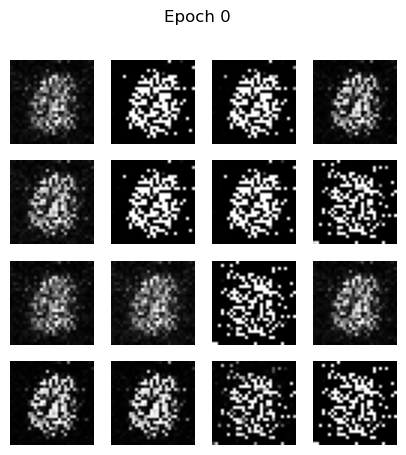

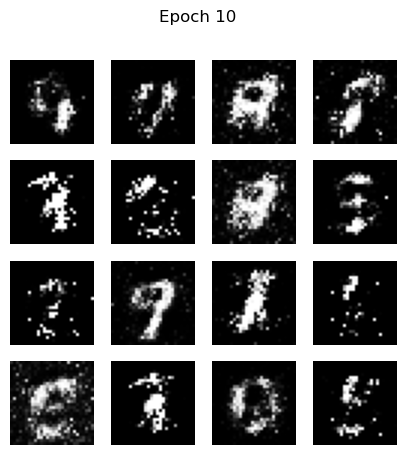

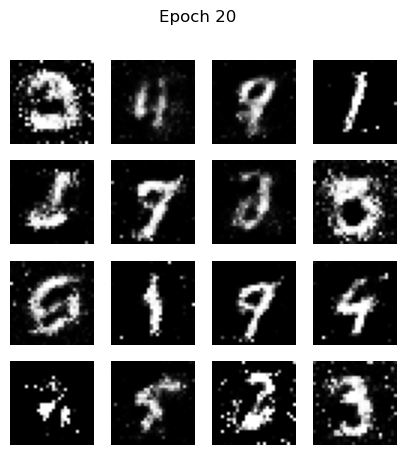

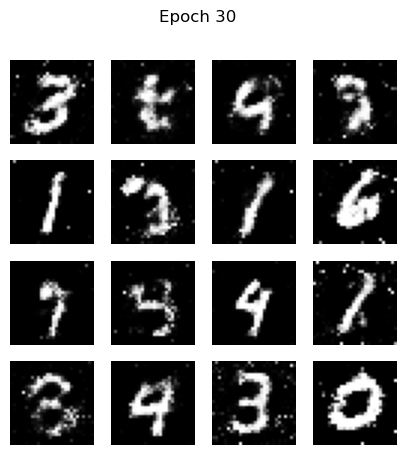

In [21]:
for i, samples in enumerate(history_pate_gan['samples']):
    plot_samples(samples, i * 10)

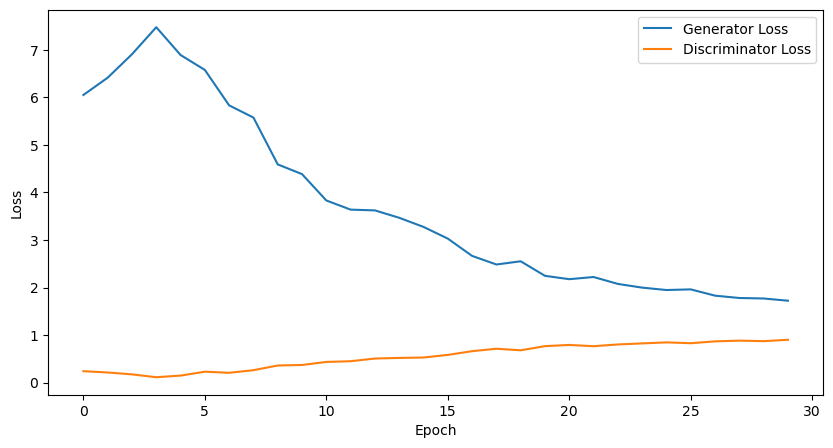

In [22]:
plot_loss(history_pate_gan)

In [25]:
save(pate_gan.generator, pate_gan.student_discriminator, history_pate_gan, teacher_models=pate_gan.teacher_models,  name='pate_gan')